In [1]:

from numpy.random import seed
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, model_selection 
%matplotlib inline

import sklearn
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

seed(8)

In [2]:

def read_in_and_split_data(iris_data):
    """
    This function takes the Iris dataset, and splits the full data set into 90% training set and 
    the remaining 10% the test set. 
    """
    
    iris_data = sklearn.datasets.load_iris()

    print(iris_data["DESCR"])

    data = iris_data["data"]
    targets = iris_data["target"]
    
    train_data, test_data, train_targets, test_targets = model_selection.train_test_split(data, targets, test_size = 0.1)
    
    
    return (train_data, test_data, train_targets, test_targets)

# Generate the test and training data

iris_data = datasets.load_iris()
train_data, test_data, train_targets, test_targets = read_in_and_split_data(iris_data)

# Convert targets to a one-hot encoding

train_targets = tf.keras.utils.to_categorical(np.array(train_targets))
test_targets = tf.keras.utils.to_categorical(np.array(test_targets))

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:

def get_model(input_shape):
    """
    This function builds a Sequential model with 10 Dense layers, and kernel and bias initializer 
    at the first layer. 
    """
    model = Sequential([
        Dense(64, kernel_initializer = "he_uniform",bias_initializer= "ones", activation = 'relu',
             input_shape = input_shape),
        Dense(128, activation = 'relu'),
        Dense(128, activation = 'relu'),
        Dense(128, activation = 'relu'),
        Dense(128, activation = 'relu'),
        Dense(64, activation = 'relu'),
        Dense(64, activation = 'relu'),
        Dense(64, activation = 'relu'),
        Dense(64, activation = 'relu'),
        Dense(3, activation = "softmax")
    ])
    
    return model

# Get the model

model = get_model(train_data[0].shape)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                320       
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 64)                4

In [4]:

def compile_model(model):
    """
    This function takes in the model, and compiles it with an Adam optimiser with learning rate of 0.0001,
    the categorical crossentropy loss function, and accuracy as the only metric. 
    """
    opt = tf.keras.optimizers.Adam(learning_rate = 0.0001)
    
    model.compile(optimizer = opt,
                 loss = 'categorical_crossentropy',
                 metrics = ['accuracy'])
    
# Compile the model
compile_model(model)

In [5]:

def train_model(model, train_data, train_targets, epochs):
    """
    This function trains the model for a given number of epochs on the 
    train_data and train_targets. 
    """
    
    training_history = model.fit(train_data, train_targets, epochs = epochs, 
                                 batch_size = 40, validation_split = 0.15, verbose = False)
    
    return training_history
    
# train the model

history = train_model(model, train_data, train_targets, epochs=800)

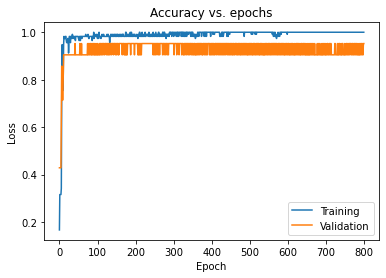

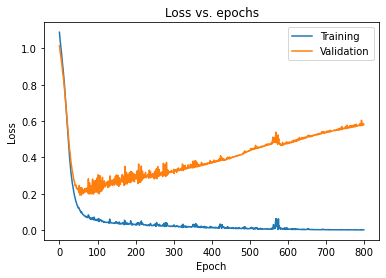

In [6]:
#Plot the epoch vs accuracy graph

try:
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
except KeyError:
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show() 

#Plot the epoch vs loss graph

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show() 

In [7]:
# To address overfitting, we adopt regularization, dropout, batch normalization, early stopping, lr reduction techniques

def get_regularised_model(input_shape, dropout_rate, weight_decay):
    """
    This function should build a regularised Sequential model, with dropouts, batch normalization, 
    and weight decay l2 regularizer
    """
    model = Sequential([
        Dense(64, kernel_initializer = "he_uniform",bias_initializer= "ones", 
              kernel_regularizer = tf.keras.regularizers.l2(weight_decay), activation = 'relu',
             input_shape = input_shape),
        Dense(128, kernel_regularizer = tf.keras.regularizers.l2(weight_decay), activation = 'relu'),
        Dense(128, kernel_regularizer = tf.keras.regularizers.l2(weight_decay), activation = 'relu'),
        Dropout(dropout_rate),
        Dense(128, kernel_regularizer = tf.keras.regularizers.l2(weight_decay), activation = 'relu'),
        Dense(128, kernel_regularizer = tf.keras.regularizers.l2(weight_decay), activation = 'relu'),
        BatchNormalization(),
        Dense(64, kernel_regularizer = tf.keras.regularizers.l2(weight_decay), activation = 'relu'),
        Dense(64, kernel_regularizer = tf.keras.regularizers.l2(weight_decay), activation = 'relu'),
        Dropout(dropout_rate),
        Dense(64, kernel_regularizer = tf.keras.regularizers.l2(weight_decay), activation = 'relu'),
        Dense(64, kernel_regularizer = tf.keras.regularizers.l2(weight_decay), activation = 'relu'),
        Dense(3, activation = "softmax")
    ])
    
    return model

# Instantiate the model, using a dropout rate of 0.3 and weight decay coefficient of 0.001

reg_model = get_regularised_model(train_data[0].shape, 0.3, 0.001)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                320       
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 64)                4

In [8]:
# Compile the model

compile_model(reg_model)

# Train the model

reg_history = train_model(reg_model, train_data, train_targets, epochs=800)

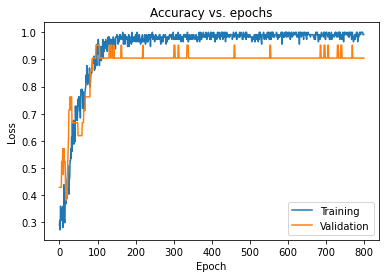

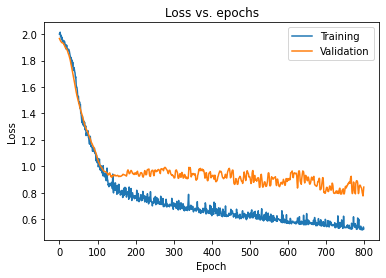

In [9]:
#Plot the new accuracy vs epoch graph

try:
    plt.plot(reg_history.history['accuracy'])
    plt.plot(reg_history.history['val_accuracy'])
except KeyError:
    plt.plot(reg_history.history['acc'])
    plt.plot(reg_history.history['val_acc'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show() 

#Plot the new loss vs epoch graph

plt.plot(reg_history.history['loss'])
plt.plot(reg_history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show() 